# Lab Segmentation 1


In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2
from numpy import bitwise_and,bitwise_or

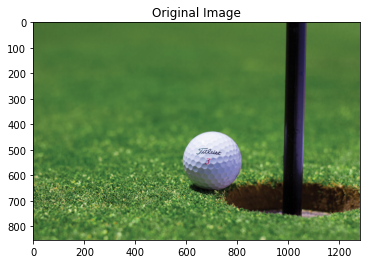

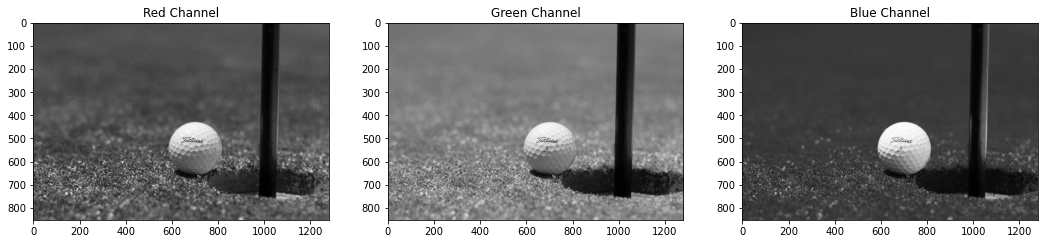

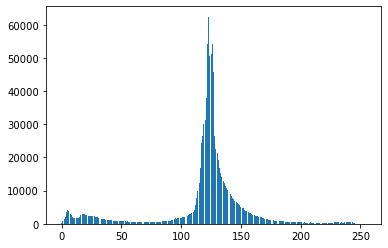

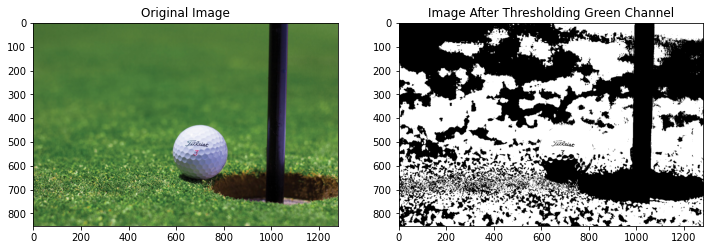

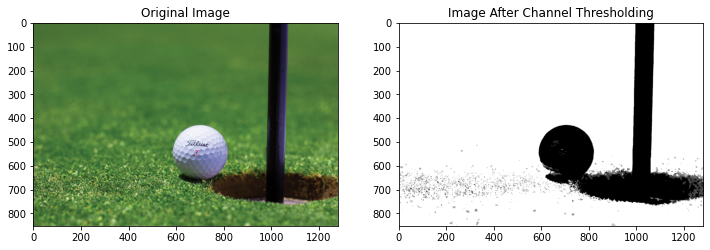

In [146]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)

# read image golf
golf_image = (io.imread("./imgs/exp1/golf.jpeg")).astype("float32")
temp_image = golf_image.copy()
show_images([golf_image.astype("uint8")], titles=["Original Image"])
ChannelThreshold = 25

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)
golf_image_Rchannel = golf_image[:, :, 0].astype("float32")
golf_image_Gchannel = golf_image[:, :, 1].astype("float32")
golf_image_Bchannel = golf_image[:, :, 2].astype("float32")


# 3- Visually (not by code) detect the dominating color channel (C) for the backgroung (R, G or B)
show_images(
    [golf_image_Rchannel, golf_image_Gchannel, golf_image_Bchannel,],
    titles=["Red Channel", "Green Channel", "Blue Channel"],
)
# The Green Channel is brighter so it's value is much higher so I think it's the most dominating color channel

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)
showHist(golf_image_Gchannel)
dominating_Channel = np.copy(golf_image_Gchannel)
dominating_Channel[dominating_Channel >= 125] = 255
dominating_Channel[dominating_Channel < 125] = 0
show_images(
    [golf_image.astype("uint8"), dominating_Channel.astype("uint8")],
    titles=["Original Image", "Image After Thresholding Green Channel"],
)

# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels
# have larger values than the other channels with an appropriate threshold
dominating_Channel = np.copy(golf_image_Gchannel)
dominating_Channel[
    np.bitwise_and(
        dominating_Channel >= golf_image_Bchannel + ChannelThreshold,
        dominating_Channel >= golf_image_Rchannel + ChannelThreshold,
    )
] = 255
dominating_Channel[
    np.bitwise_and(
        dominating_Channel < golf_image_Bchannel + ChannelThreshold,
        dominating_Channel < golf_image_Rchannel + ChannelThreshold,
    )
] = 0


# 6- display the binarized image
show_images(
    [golf_image.astype("uint8"), dominating_Channel],
    titles=["Original Image", "Image After Channel Thresholding"],
)


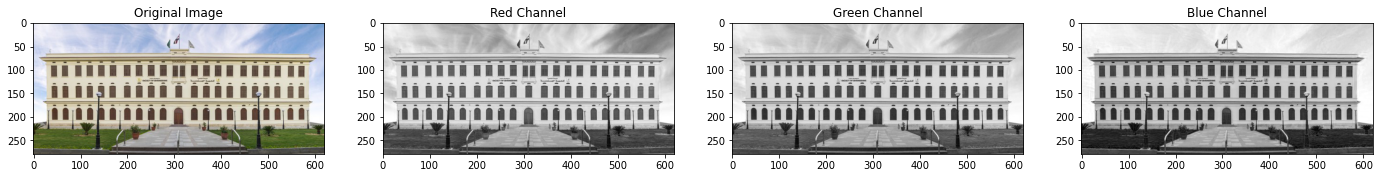

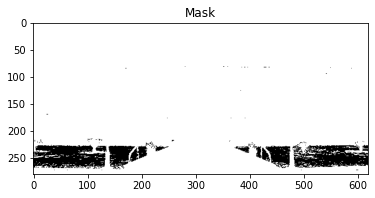

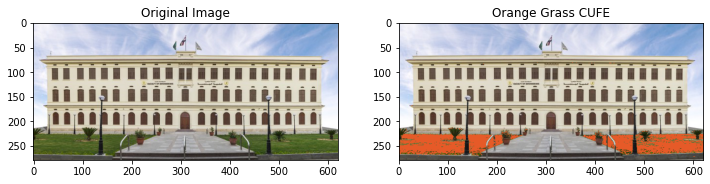

In [141]:
# 1- Get the required RGB color (Using a color picker)
R = 70
G = 100
B = 40
Threshold = 30

# 2- Read image
cufe_image = io.imread("./imgs/exp2/cufe.png").astype("float32")

# 3- extract R, G and B channels (as float)
cufe_image_Rchannel = cufe_image[:, :, 0].astype("float32")
cufe_image_Gchannel = cufe_image[:, :, 1].astype("float32")
cufe_image_Bchannel = cufe_image[:, :, 2].astype("float32")
show_images(
    [
        cufe_image.astype("uint8"),
        cufe_image_Rchannel,
        cufe_image_Gchannel,
        cufe_image_Bchannel,
    ],
    titles=["Original Image", "Red Channel", "Green Channel", "Blue Channel"],
)

# 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
diff_Rchannel = abs(R - cufe_image_Rchannel)
diff_Gchannel = abs(G - cufe_image_Gchannel)
diff_Bchannel = abs(B - cufe_image_Bchannel)

# 5- calculate overall distance from the given RGB color (use any appropriate distance measure, take care of the minus distances)
diff = np.sqrt((diff_Rchannel) ** 2 + (diff_Gchannel) ** 2 + (diff_Bchannel) ** 2)


# 6-  create a mask by thresholding the differences
temp = np.copy(cufe_image)
diff[diff >= Threshold] = 255
diff[diff < Threshold] = 0
show_images([diff], titles=["Mask"])
# 7- In the input image, Replace the pixels of the mask with the following color
# R = 230 , G = 90 , B=40
temp[diff <= Threshold, 0] = 230
temp[diff <= Threshold, 1] = 90
temp[diff <= Threshold, 2] = 40


# 8- show the image or save it
show_images(
    [cufe_image.astype("uint8"), temp.astype("uint8")],
    titles=["Original Image", "Orange Grass CUFE"],
)
